In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('../../data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [23]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              180
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [24]:

# A set of new columns for a new dataframe. Filter out nonmatching columns
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

# Get an average between low and high price for the base pumpkin price
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Convert the date to its month only
month = pd.DatetimeIndex(pumpkins['Date']).month

# Create a new dataframe with this basic data
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

# Convert the price if the Package contains fractional bushel values
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

print(new_pumpkins)



      Month               Package  Low Price  High Price      Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.636364
71        9  1 1/9 bushel cartons      18.00        18.0  16.363636
72       10  1 1/9 bushel cartons      18.00        18.0  16.363636
73       10  1 1/9 bushel cartons      17.00        17.0  15.454545
74       10  1 1/9 bushel cartons      15.00        15.0  13.636364
...     ...                   ...        ...         ...        ...
1738      9    1/2 bushel cartons      15.00        15.0  30.000000
1739      9    1/2 bushel cartons      13.75        15.0  28.750000
1740      9    1/2 bushel cartons      10.75        15.0  25.750000
1741      9    1/2 bushel cartons      12.00        12.0  24.000000
1742      9    1/2 bushel cartons      12.00        12.0  24.000000

[415 rows x 5 columns]


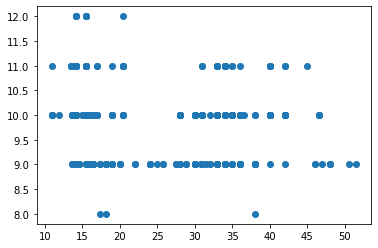

In [45]:

price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()


Text(0, 0.5, 'Pumpkin Price')

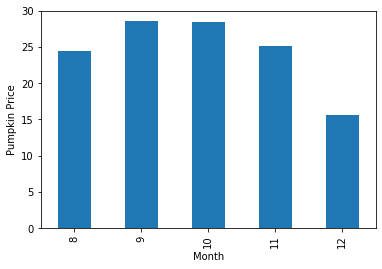

In [48]:

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")